In [32]:
import os
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py  
if not os.path.exists('thinkplot.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkplot.py  

# Importar las librerías necesarias
try:
    import thinkdsp
    print("thinkdsp importado correctamente.")
except ImportError as e:
    print(f"ERROR: No se pudo importar thinkdsp: {e}")

try:
    import thinkplot
    print("thinkplot importado correctamente.")
except ImportError as e:
    print(f"ERROR: No se pudo importar thinkplot: {e}")

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

# Configuración adicional de matplotlib
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("\nLibrerías importadas y configuración lista.")

thinkdsp importado correctamente.
thinkplot importado correctamente.

Librerías importadas y configuración lista.


In [33]:
%%markdown
# Análisis Teórico del Circuito RLC Serie

## Ecuación diferencial
El circuito RLC serie está formado por una resistencia (R), un inductor (L) y un capacitor (C) conectados en serie. 
La ecuación diferencial que describe el comportamiento del circuito es:

$$L\\frac{d^2q}{dt^2} + R\\frac{dq}{dt} + \\frac{1}{C}q = V(t)$$

Donde $q$ es la carga en el capacitor.

En términos del voltaje en el capacitor ($V_C$), la ecuación se convierte en:

$$LC\\frac{d^2V_C}{dt^2} + RC\\frac{dV_C}{dt} + V_C = V(t)$$

## Función de transferencia
La función de transferencia $H(s)$ en el dominio de Laplace es:

$$H(s) = \\frac{V_C(s)}{V(s)} = \\frac{1}{LCs^2 + RCs + 1}$$

Podemos expresarla en términos de la frecuencia natural $\\omega_0$ y el factor de amortiguamiento $\\zeta$:

$$\\omega_0 = \\frac{1}{\\sqrt{LC}} \\quad \\text{(frecuencia natural)}$$
$$\\zeta = \\frac{R}{2} \\sqrt{\\frac{C}{L}} \\quad \\text{(factor de amortiguamiento)}$$

Entonces:

$$H(s) = \\frac{\\omega_0^2}{s^2 + 2\\zeta\\omega_0 s + \\omega_0^2}$$

## Tipos de respuesta
El comportamiento del circuito depende del valor de $\\zeta$:

- $\\zeta < 1$: **Subamortiguado** - El sistema oscila con una frecuencia amortiguada $\\omega_d = \\omega_0 \\sqrt{1-\\zeta^2}$
- $\\zeta = 1$: **Críticamente amortiguado** - La respuesta más rápida sin oscilaciones
- $\\zeta > 1$: **Sobreamortiguado** - Respuesta lenta sin oscilaciones

# Análisis Teórico del Circuito RLC Serie

## Ecuación diferencial
El circuito RLC serie está formado por una resistencia (R), un inductor (L) y un capacitor (C) conectados en serie. 
La ecuación diferencial que describe el comportamiento del circuito es:

$$L\\frac{d^2q}{dt^2} + R\\frac{dq}{dt} + \\frac{1}{C}q = V(t)$$

Donde $q$ es la carga en el capacitor.

En términos del voltaje en el capacitor ($V_C$), la ecuación se convierte en:

$$LC\\frac{d^2V_C}{dt^2} + RC\\frac{dV_C}{dt} + V_C = V(t)$$

## Función de transferencia
La función de transferencia $H(s)$ en el dominio de Laplace es:

$$H(s) = \\frac{V_C(s)}{V(s)} = \\frac{1}{LCs^2 + RCs + 1}$$

Podemos expresarla en términos de la frecuencia natural $\\omega_0$ y el factor de amortiguamiento $\\zeta$:

$$\\omega_0 = \\frac{1}{\\sqrt{LC}} \\quad \\text{(frecuencia natural)}$$
$$\\zeta = \\frac{R}{2} \\sqrt{\\frac{C}{L}} \\quad \\text{(factor de amortiguamiento)}$$

Entonces:

$$H(s) = \\frac{\\omega_0^2}{s^2 + 2\\zeta\\omega_0 s + \\omega_0^2}$$

## Tipos de respuesta
El comportamiento del circuito depende del valor de $\\zeta$:

- $\\zeta < 1$: **Subamortiguado** - El sistema oscila con una frecuencia amortiguada $\\omega_d = \\omega_0 \\sqrt{1-\\zeta^2}$
- $\\zeta = 1$: **Críticamente amortiguado** - La respuesta más rápida sin oscilaciones
- $\\zeta > 1$: **Sobreamortiguado** - Respuesta lenta sin oscilaciones


In [34]:
def respuesta_rlc(R, L, C, t, tipo_entrada='escalón'):
    """
    Calcula la respuesta de un circuito RLC serie ante diferentes tipos de entrada.
    
    Parámetros:
    R: Resistencia en ohmios (Ω)
    L: Inductancia en henrios (H)
    C: Capacitancia en faradios (F)
    t: Vector de tiempo
    tipo_entrada: Tipo de señal de entrada ('impulso', 'escalón', 'seno')
    
    Retorna:
    wave: Objeto Wave con la respuesta temporal del circuito
    """
    # Calcular parámetros fundamentales
    w0 = 1 / np.sqrt(L * C)  # Frecuencia natural en rad/s
    zeta = R / (2 * np.sqrt(L / C))  # Factor de amortiguamiento
    
    # Calcular respuesta según el tipo de entrada
    if tipo_entrada == 'impulso':
        # Respuesta al impulso unitario
        if zeta < 1:  # Subamortiguado
            wd = w0 * np.sqrt(1 - zeta**2)  # Frecuencia amortiguada
            respuesta = (w0 / np.sqrt(1 - zeta**2)) * np.exp(-zeta * w0 * t) * np.sin(wd * t)
        elif zeta == 1:  # Críticamente amortiguado
            respuesta = w0**2 * t * np.exp(-w0 * t)
        else:  # Sobreamortiguado
            a = zeta * w0 + w0 * np.sqrt(zeta**2 - 1)
            b = -zeta * w0 + w0 * np.sqrt(zeta**2 - 1)
            respuesta = (a * np.exp(-b * t) - b * np.exp(-a * t)) / (a - b)
    
    elif tipo_entrada == 'escalón':
        # Respuesta al escalón unitario
        if zeta < 1:  # Subamortiguado
            wd = w0 * np.sqrt(1 - zeta**2)
            respuesta = 1 - (np.exp(-zeta * w0 * t) / np.sqrt(1 - zeta**2)) * np.sin(wd * t + np.arccos(zeta))
        elif zeta == 1:  # Críticamente amortiguado
            respuesta = 1 - (1 + w0 * t) * np.exp(-w0 * t)
        else:  # Sobreamortiguado
            a = zeta * w0 + w0 * np.sqrt(zeta**2 - 1)
            b = -zeta * w0 + w0 * np.sqrt(zeta**2 - 1)
            respuesta = 1 + (b * np.exp(-a * t) - a * np.exp(-b * t)) / (a - b)
    
    elif tipo_entrada == 'seno':
        # Respuesta a entrada senoidal (1 Hz por defecto)
        f = 1  # Frecuencia de la entrada en Hz
        omega = 2 * np.pi * f
        # Magnitud y fase de la función de transferencia
        H_magnitud = 1 / np.sqrt((1 - (omega/w0)**2)**2 + (2*zeta*omega/w0)**2)
        H_fase = -np.arctan2(2*zeta*omega/w0, 1 - (omega/w0)**2)
        # Respuesta en estado estacionario
        respuesta = H_magnitud * np.sin(2*np.pi*f*t + H_fase)
    
    # Crear objeto Wave con la respuesta
    wave = thinkdsp.Wave(respuesta, ts=t)
    return wave

In [35]:
def graficar_respuesta_rlc(wave, R, L, C, titulo=""):
    """
    Grafica la respuesta temporal, espectro y fase de un circuito RLC.
    
    Parámetros:
    wave: Objeto Wave con la respuesta temporal
    R: Resistencia en ohmios (Ω)
    L: Inductancia en henrios (H)
    C: Capacitancia en faradios (F)
    titulo: Título adicional para las gráficas
    """
    # Calcular parámetros del circuito
    w0 = 1 / np.sqrt(L * C)  # Frecuencia natural en rad/s
    f0 = w0 / (2 * np.pi)  # Frecuencia natural en Hz
    zeta = R / (2 * np.sqrt(L / C))  # Factor de amortiguamiento
    
    # Crear figura con 3 subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))
    
    # 1. Gráfico de respuesta temporal
    plt.sca(ax1)  # Establecer el Axes actual
    wave.plot()
    ax1.set_title(f'Respuesta temporal {titulo}\nR={R} Ω, L={L} H, C={C} F (ζ={zeta:.3f})')
    ax1.set_xlabel('Tiempo (s)')
    ax1.set_ylabel('Voltaje (V)')
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Añadir líneas verticales para tiempos característicos
    if zeta < 1:  # Subamortiguado
        Td = 2 * np.pi / (w0 * np.sqrt(1 - zeta**2))  # Periodo de oscilación amortiguada
        ax1.axvline(x=Td, color='r', linestyle='--', alpha=0.5, label=f'Periodo Td={Td:.4f} s')
        ax1.legend()
    
    # 2. Calcular y graficar espectro
    spectrum = wave.make_spectrum()
    # Determinar límite superior para el eje x basado en la frecuencia natural
    high_freq = min(10 * f0, 1/(2*wave.ts[1]))  # No exceder la frecuencia de Nyquist
    
    plt.sca(ax2)  # Establecer el Axes actual
    spectrum.plot(high=high_freq)
    ax2.set_title('Espectro de frecuencia')
    ax2.set_xlabel('Frecuencia (Hz)')
    ax2.set_ylabel('Magnitud')
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    # Resaltar la frecuencia de resonancia si es subamortiguado
    if zeta < 1:
        fres = f0 * np.sqrt(1 - 2*zeta**2)  # Frecuencia de resonancia
        ax2.axvline(x=fres, color='r', linestyle='--', alpha=0.5, label=f'Frecuencia de resonancia={fres:.2f} Hz')
        ax2.legend()
    
    # 3. Graficar fase
    plt.sca(ax3)  # Establecer el Axes actual
    spectrum.plot_phase(high=high_freq)
    ax3.set_title('Fase')
    ax3.set_xlabel('Frecuencia (Hz)')
    ax3.set_ylabel('Fase (radianes)')
    ax3.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    # Mostrar información detallada del circuito
    print(f"{'='*50}")
    print(f"ANÁLISIS DEL CIRCUITO RLC: {titulo}")
    print(f"{'='*50}")
    print(f"Resistencia (R): {R} Ω")
    print(f"Inductancia (L): {L} H")
    print(f"Capacitancia (C): {C} F")
    print(f"Frecuencia natural (f0): {f0:.4f} Hz")
    print(f"Factor de amortiguamiento (ζ): {zeta:.4f}")
    
    # Clasificar y describir el tipo de respuesta
    if zeta < 1:
        wd = w0 * np.sqrt(1 - zeta**2)
        fd = wd / (2 * np.pi)
        print(f"El circuito está SUBAMORTIGUADO (0 < ζ < 1)")
        print(f"Frecuencia de oscilación amortiguada (fd): {fd:.4f} Hz")
        print(f"Periodo de oscilación (Td): {1/fd:.6f} s")
    elif zeta == 1:
        print("El circuito está CRÍTICAMENTE AMORTIGUADO (ζ = 1)")
    else:
        print("El circuito está SOBREAMORTIGUADO (ζ > 1)")
        tau1 = 1 / (w0 * (zeta - np.sqrt(zeta**2 - 1)))
        tau2 = 1 / (w0 * (zeta + np.sqrt(zeta**2 - 1)))
        print(f"Constantes de tiempo: tau1 = {tau1:.6f} s, tau2 = {tau2:.6f} s")

In [39]:
# Crear vector de tiempo común para todos los casos
dt = 1e-5  # Paso de tiempo: 10 microsegundos
duracion = 0.02  # Duración total: 20 milisegundos
t = np.arange(0, duracion, dt)

# Definir casos con valores comerciales típicos de R, L, C
casos = [
    {
        "nombre": "Caso 1: Subamortiguado (R baja)",
        "R": 10,      # 10 ohmios (valor comercial común)
        "L": 0.1,     # 100 mH (valor comercial común)
        "C": 1e-6,    # 1 μF (valor comercial común)
        "entrada": "escalón",
        "comentario": "Este caso muestra un comportamiento subamortiguado con oscilaciones claras. El factor de amortiguamiento es menor que 1, lo que permite que el sistema oscile antes de estabilizarse."
    },
    {
        "nombre": "Caso 2: Críticamente amortiguado",
        "R": 632,     # Valor calculado para amortiguamiento crítico con L=0.1H, C=1μF
        "L": 0.1,     # 100 mH
        "C": 1e-6,    # 1 μF
        "entrada": "escalón",
        "comentario": "Este es un caso críticamente amortiguado, que representa la transición entre el comportamiento oscilatorio y no oscilatorio. Es la respuesta más rápida posible sin sobrepico."
    },
    {
        "nombre": "Caso 3: Sobreamortiguado (R alta)",
        "R": 2000,    # 2 kΩ (valor comercial común)
        "L": 0.1,     # 100 mH
        "C": 1e-6,    # 1 μF
        "entrada": "escalón",
        "comentario": "En este caso sobreamortiguado, el sistema tarda más en estabilizarse que en el caso críticamente amortiguado, pero sin oscilaciones. La alta resistencia disipa rápidamente la energía."
    },
    {
        "nombre": "Caso 4: Subamortiguado con baja frecuencia",
        "R": 50,      # 50 ohmios
        "L": 1.0,     # 1 H (valor comercial común)
        "C": 10e-6,   # 10 μF (valor comercial común)
        "entrada": "escalón",
        "comentario": "Similar al Caso 1 pero con una frecuencia natural más baja debido a valores mayores de L y C. Las oscilaciones son más lentas pero aún claramente visibles."
    },
    {
        "nombre": "Caso 5: Sobreamortiguado extremo",
        "R": 5000,    # 5 kΩ (valor comercial común)
        "L": 0.1,     # 100 mH
        "C": 1e-6,    # 1 μF
        "entrada": "escalón",
        "comentario": "Con una resistencia muy alta, el circuito está fuertemente sobreamortiguado. La respuesta es muy lenta y no presenta oscilaciones. La constante de tiempo es dominada por la resistencia alta."
    }
]


CASO 1: SUBAMORTIGUADO (R BAJA)


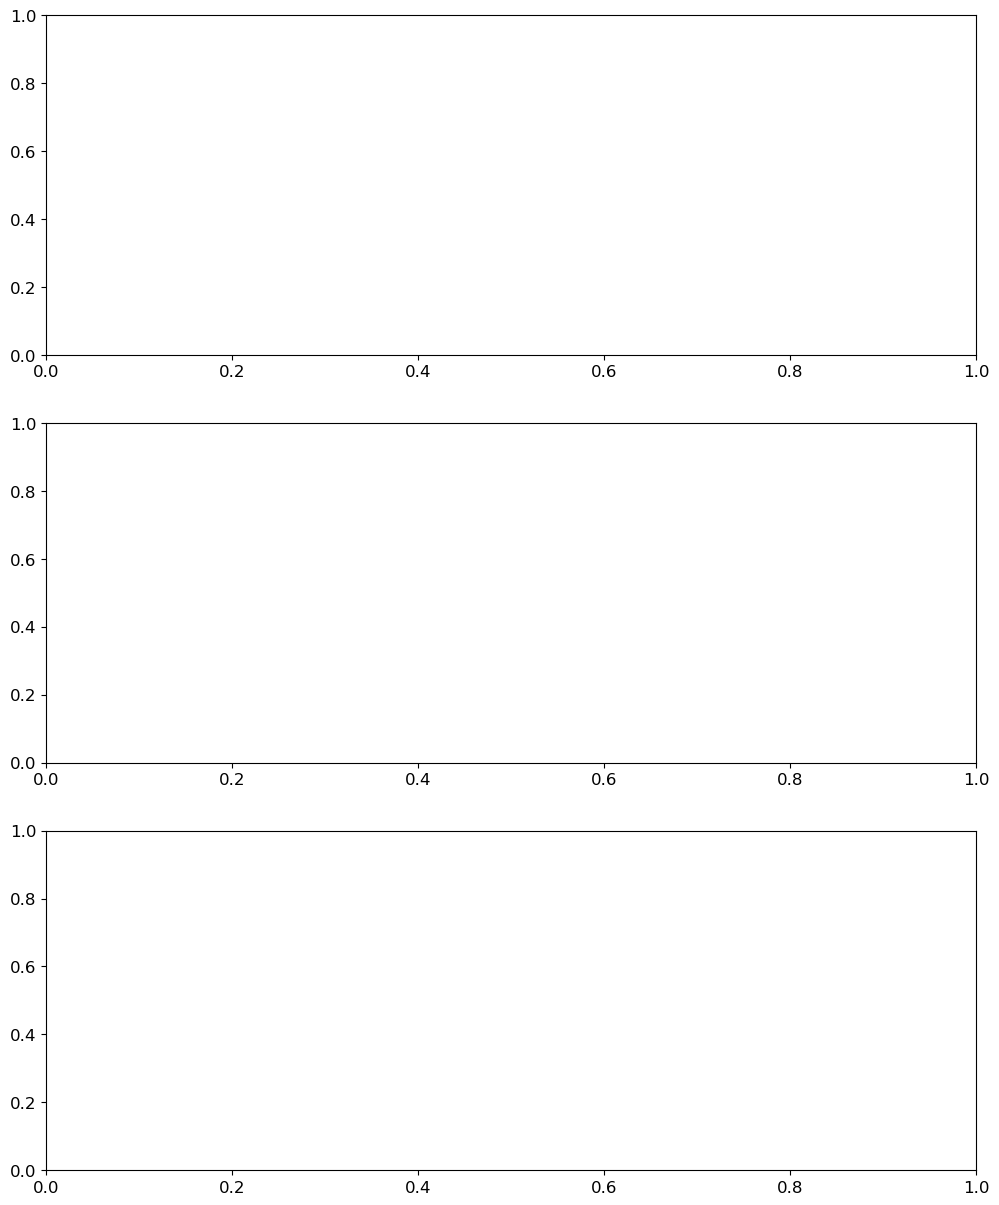

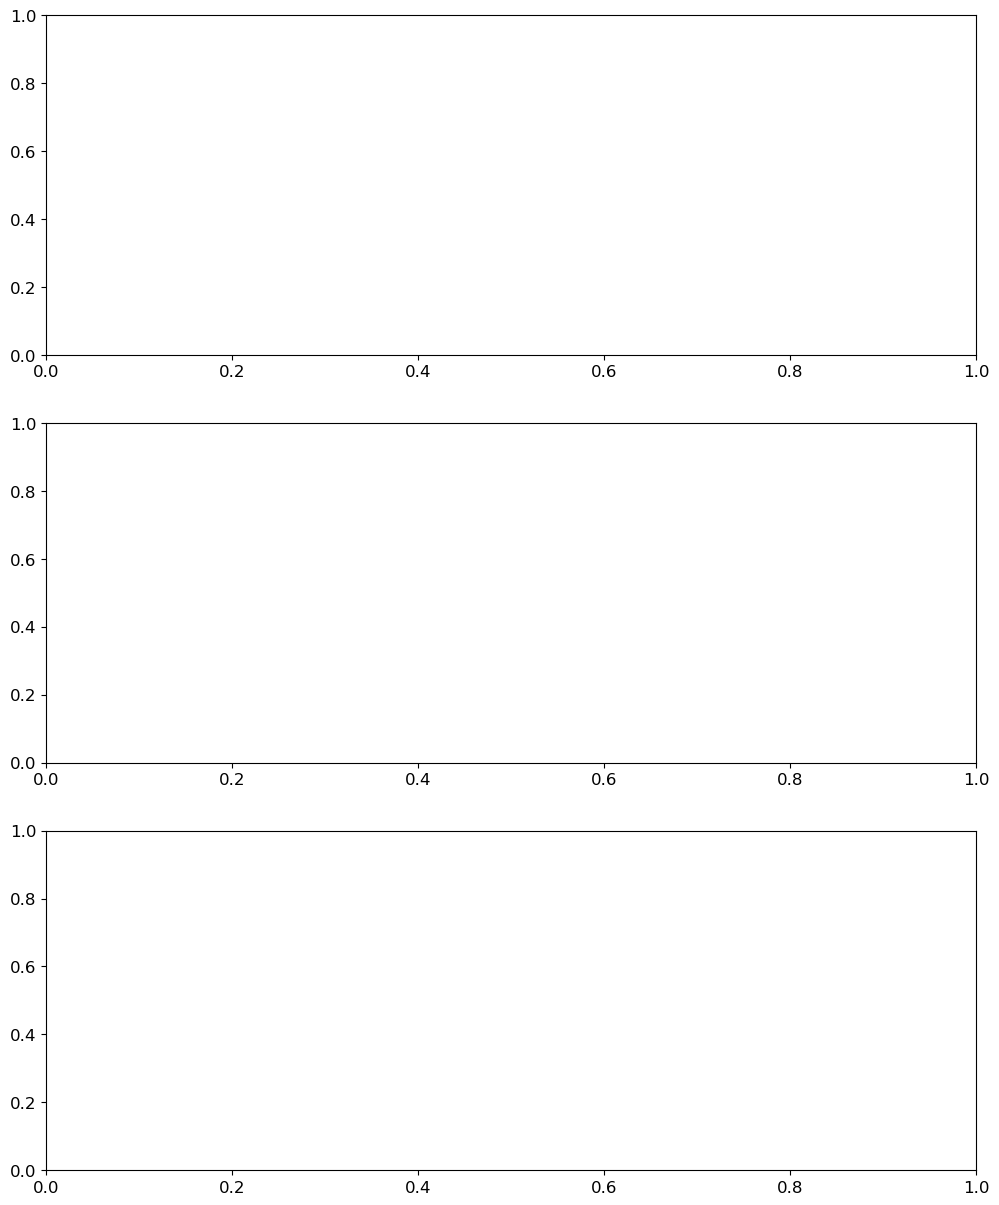

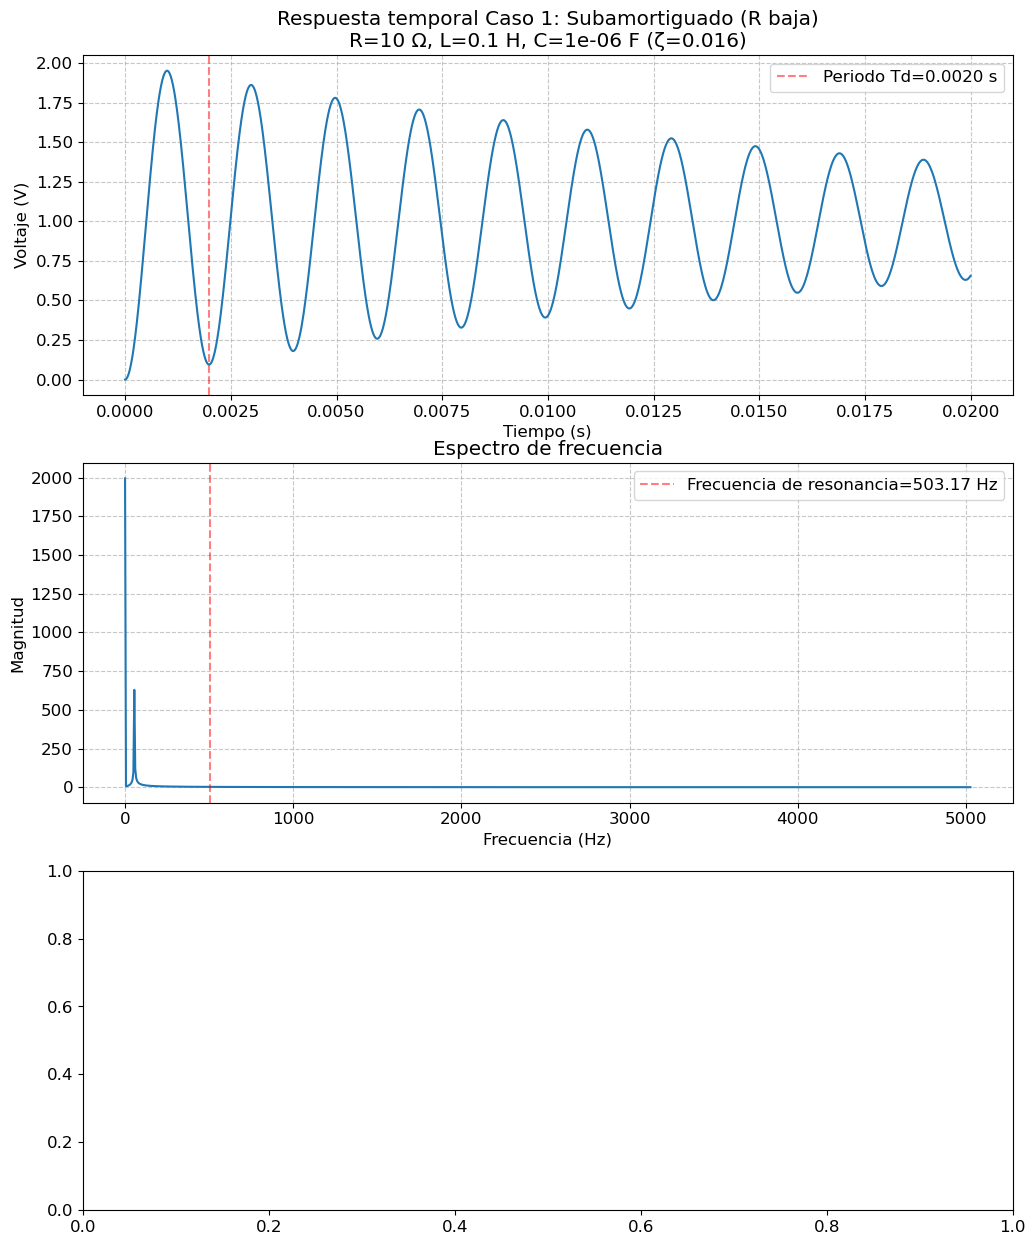

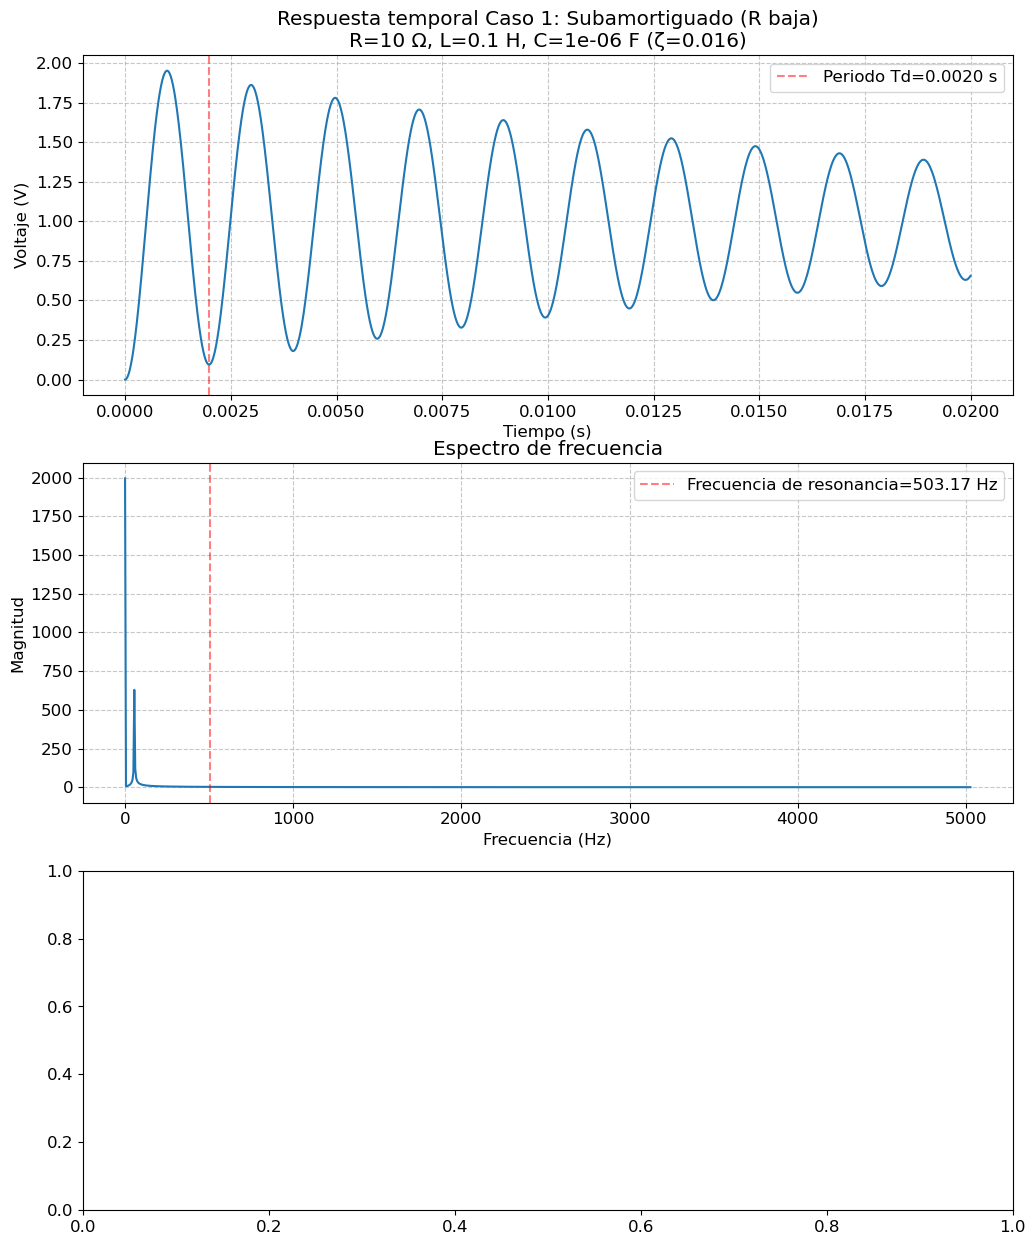

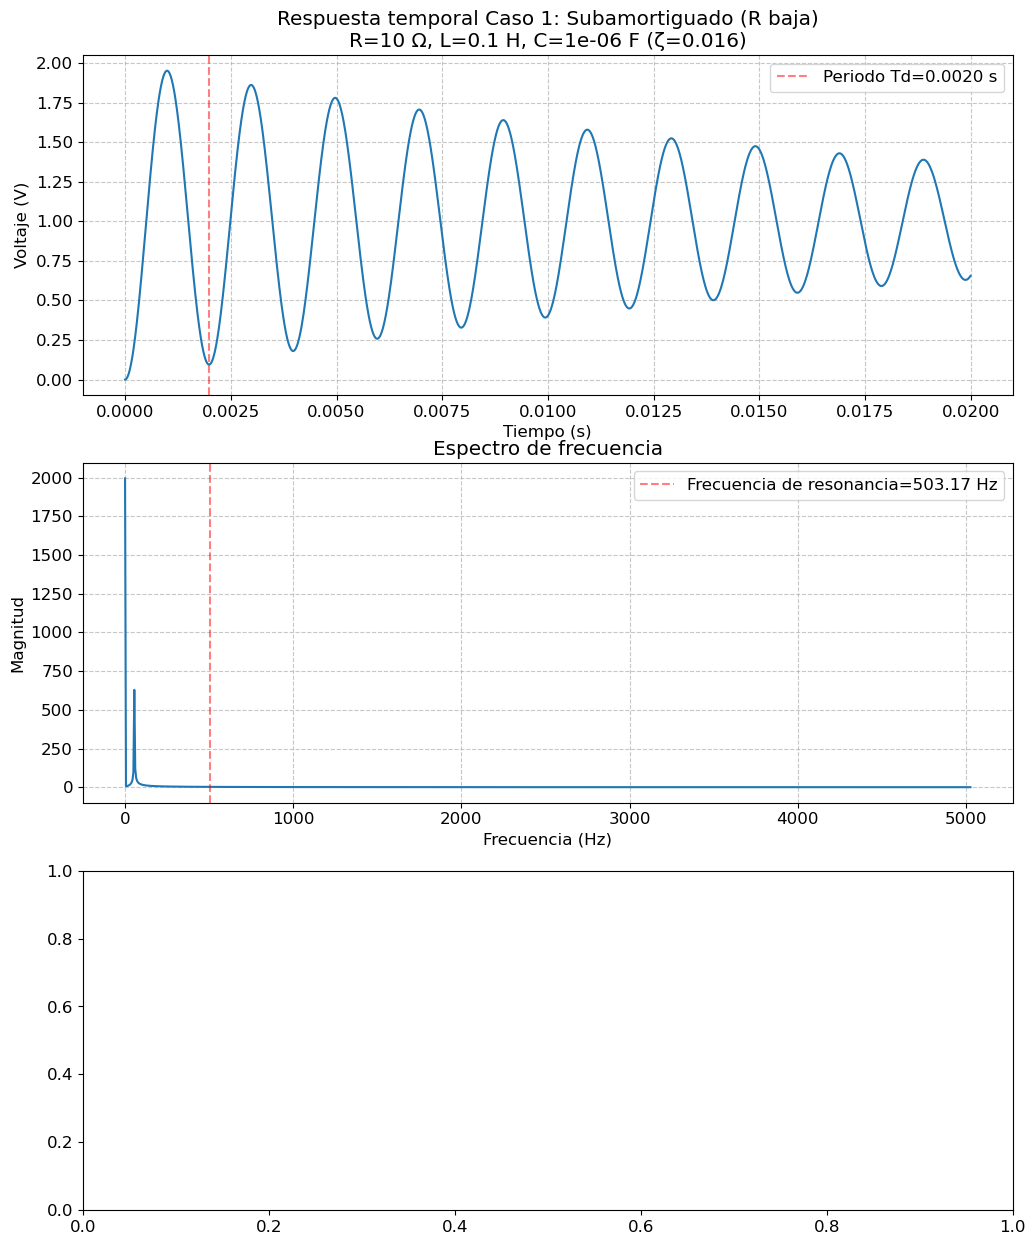

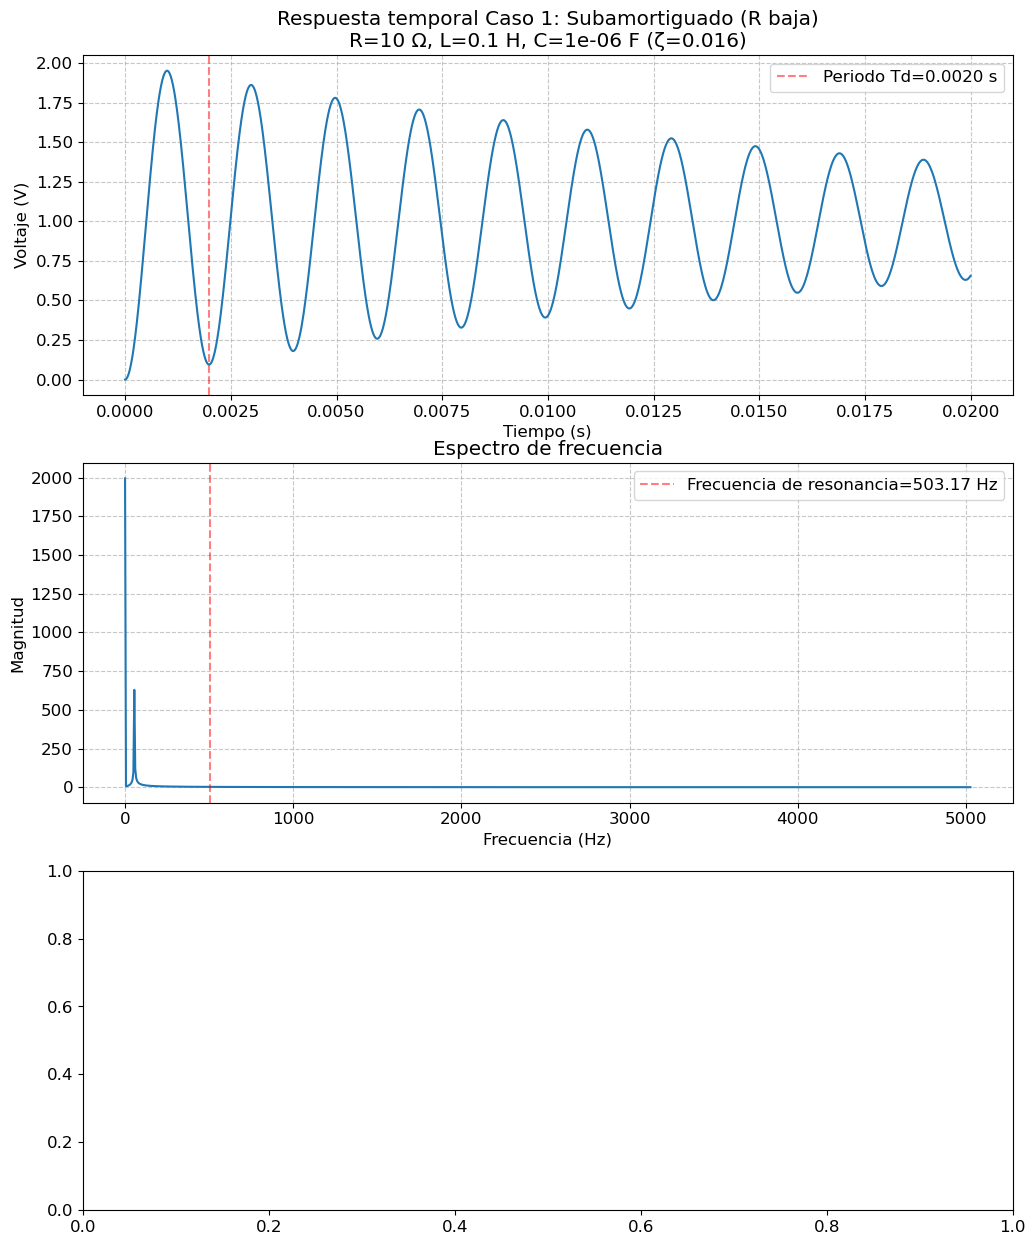

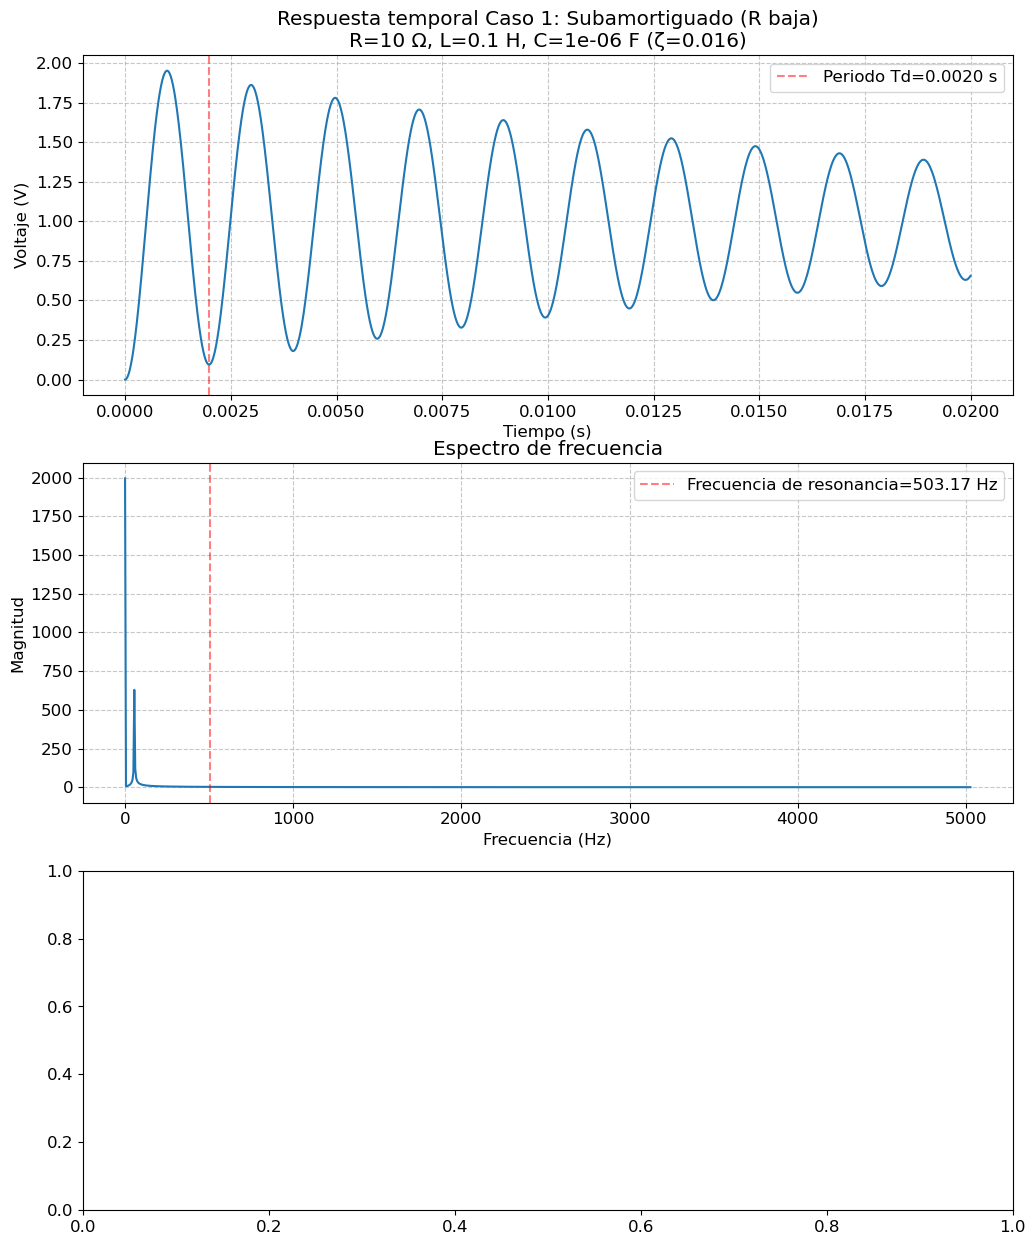

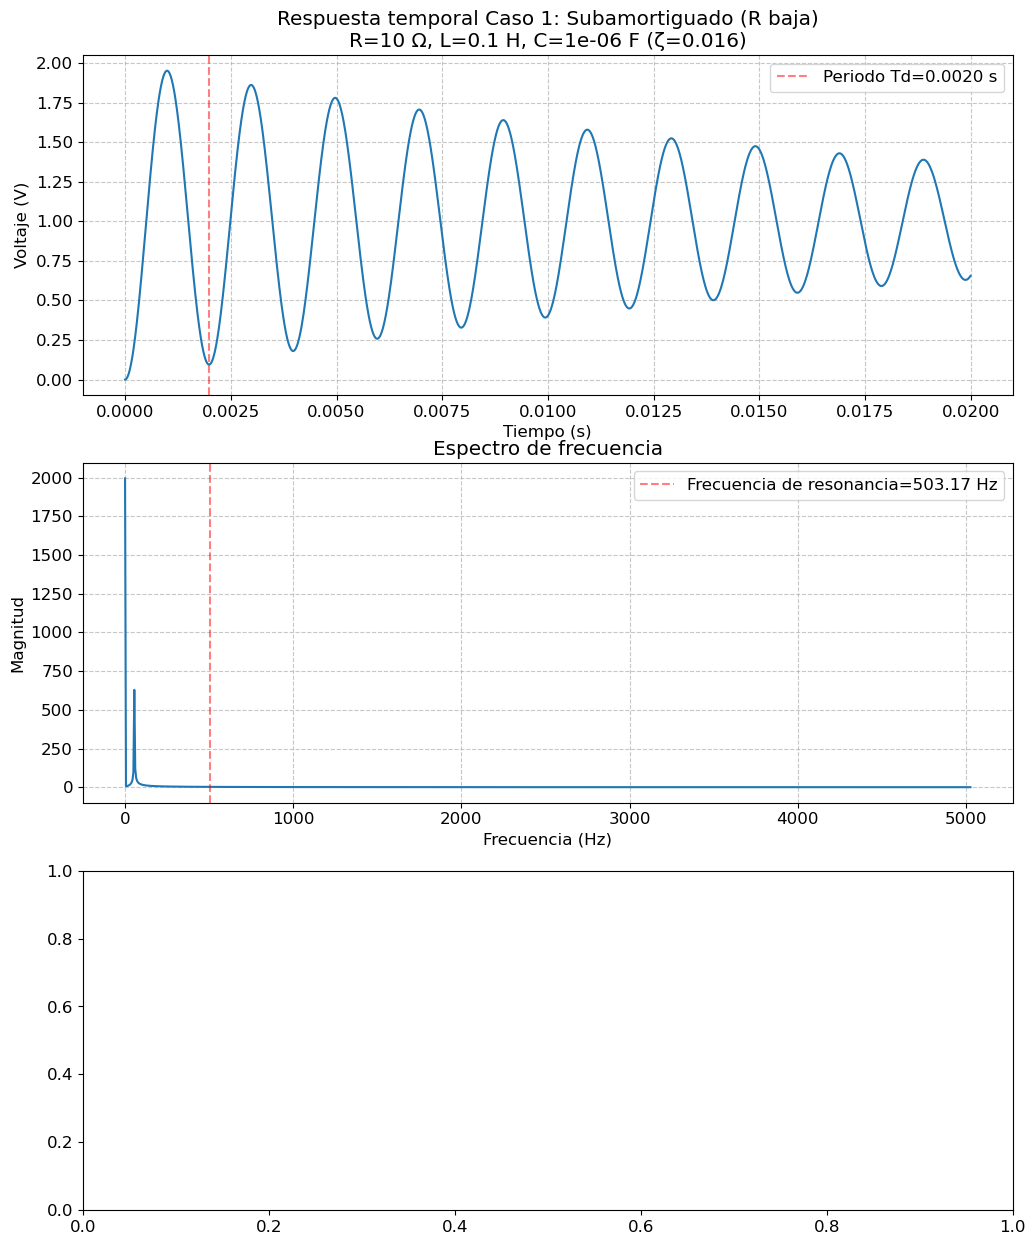

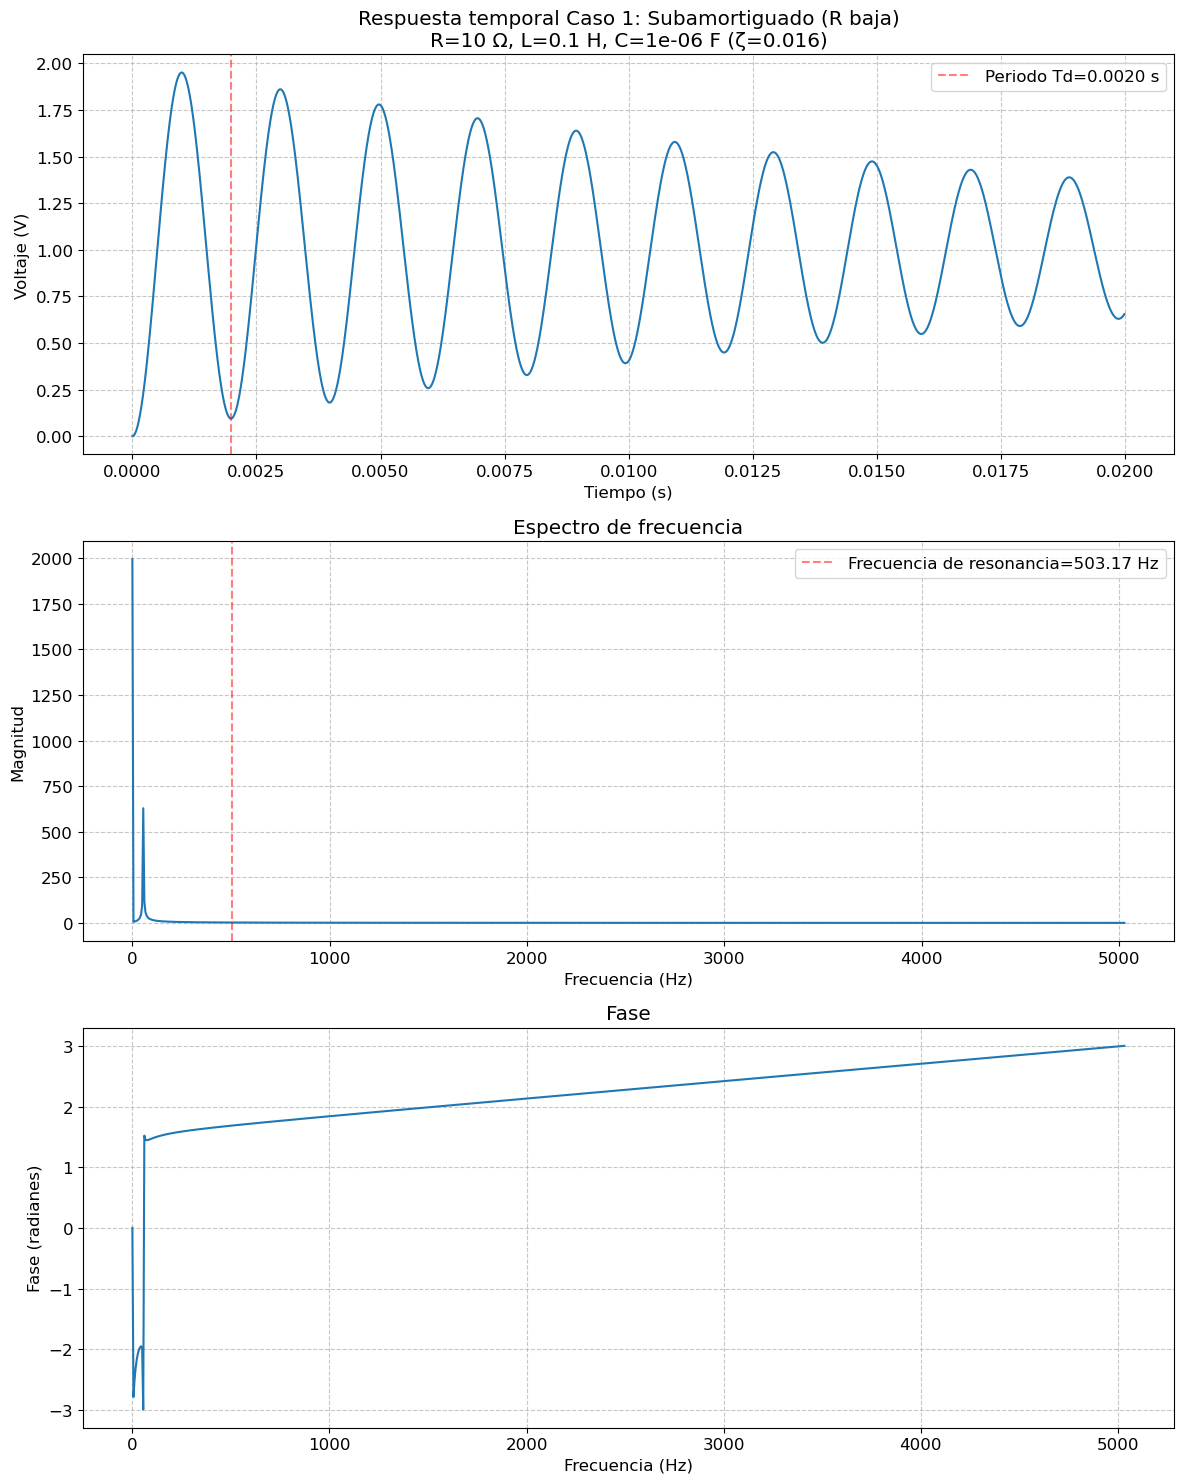

ANÁLISIS DEL CIRCUITO RLC: Caso 1: Subamortiguado (R baja)
Resistencia (R): 10 Ω
Inductancia (L): 0.1 H
Capacitancia (C): 1e-06 F
Frecuencia natural (f0): 503.2921 Hz
Factor de amortiguamiento (ζ): 0.0158
El circuito está SUBAMORTIGUADO (0 < ζ < 1)
Frecuencia de oscilación amortiguada (fd): 503.2292 Hz
Periodo de oscilación (Td): 0.001987 s

ANÁLISIS DETALLADO:
Este caso muestra un comportamiento subamortiguado con oscilaciones claras. El factor de amortiguamiento es menor que 1, lo que permite que el sistema oscile antes de estabilizarse.

Características adicionales:
- Frecuencia de oscilación: 503.23 Hz
- Sobrepico estimado: 95.15%

CASO 2: CRÍTICAMENTE AMORTIGUADO


/tmp/ipykernel_11454/4134946708.py:43: RuntimeWarning: invalid value encountered in sqrt
  fres = f0 * np.sqrt(1 - 2*zeta**2)


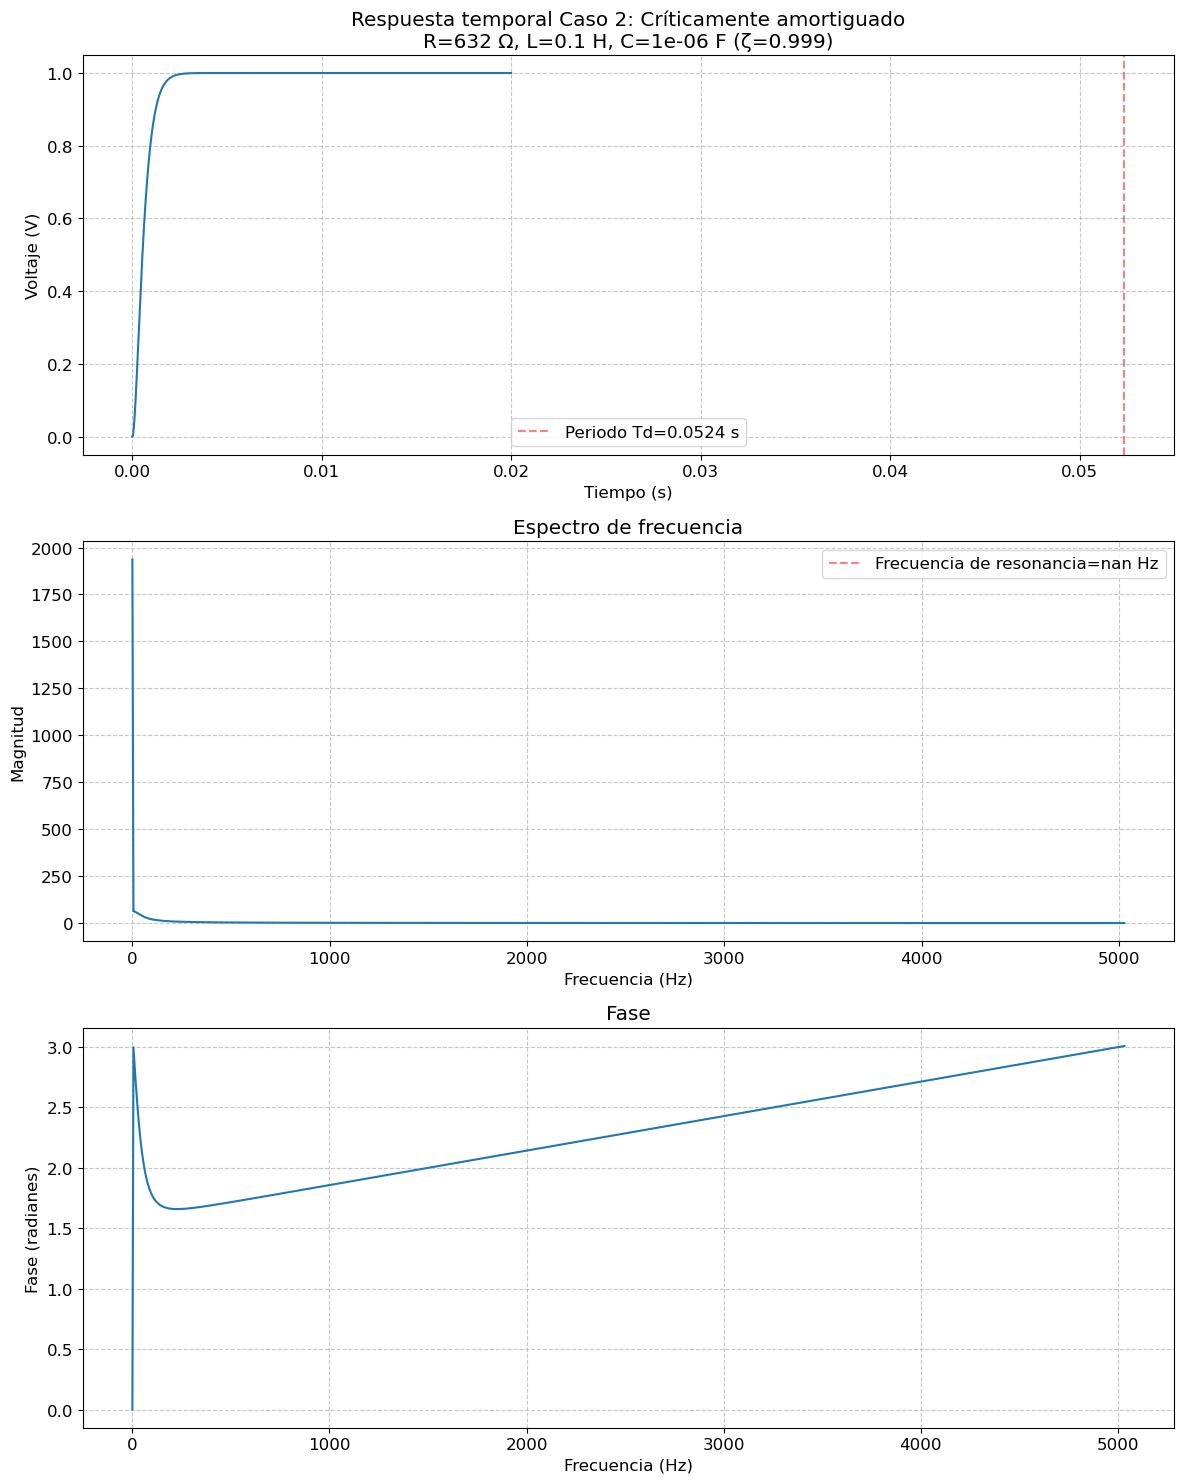

ANÁLISIS DEL CIRCUITO RLC: Caso 2: Críticamente amortiguado
Resistencia (R): 632 Ω
Inductancia (L): 0.1 H
Capacitancia (C): 1e-06 F
Frecuencia natural (f0): 503.2921 Hz
Factor de amortiguamiento (ζ): 0.9993
El circuito está SUBAMORTIGUADO (0 < ζ < 1)
Frecuencia de oscilación amortiguada (fd): 19.0986 Hz
Periodo de oscilación (Td): 0.052360 s

ANÁLISIS DETALLADO:
Este es un caso críticamente amortiguado, que representa la transición entre el comportamiento oscilatorio y no oscilatorio. Es la respuesta más rápida posible sin sobrepico.

CASO 3: SOBREAMORTIGUADO (R ALTA)


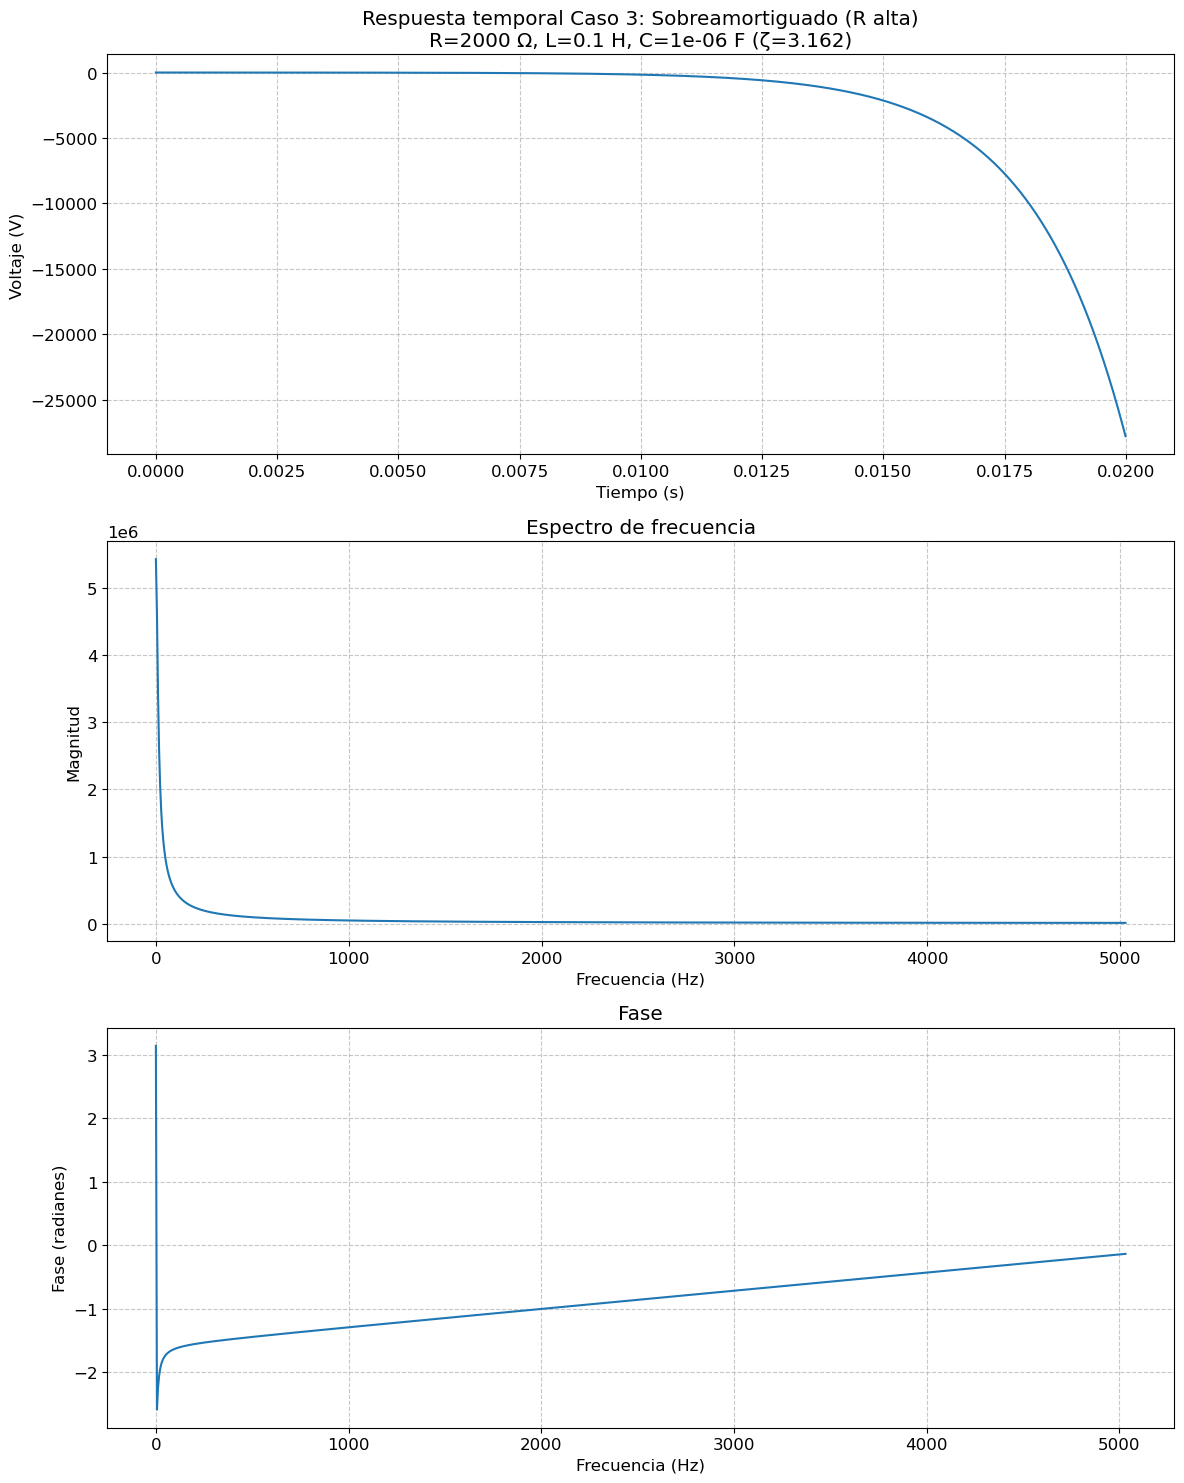

ANÁLISIS DEL CIRCUITO RLC: Caso 3: Sobreamortiguado (R alta)
Resistencia (R): 2000 Ω
Inductancia (L): 0.1 H
Capacitancia (C): 1e-06 F
Frecuencia natural (f0): 503.2921 Hz
Factor de amortiguamiento (ζ): 3.1623
El circuito está SOBREAMORTIGUADO (ζ > 1)
Constantes de tiempo: tau1 = 0.001949 s, tau2 = 0.000051 s

ANÁLISIS DETALLADO:
En este caso sobreamortiguado, el sistema tarda más en estabilizarse que en el caso críticamente amortiguado, pero sin oscilaciones. La alta resistencia disipa rápidamente la energía.

CASO 4: SUBAMORTIGUADO CON BAJA FRECUENCIA


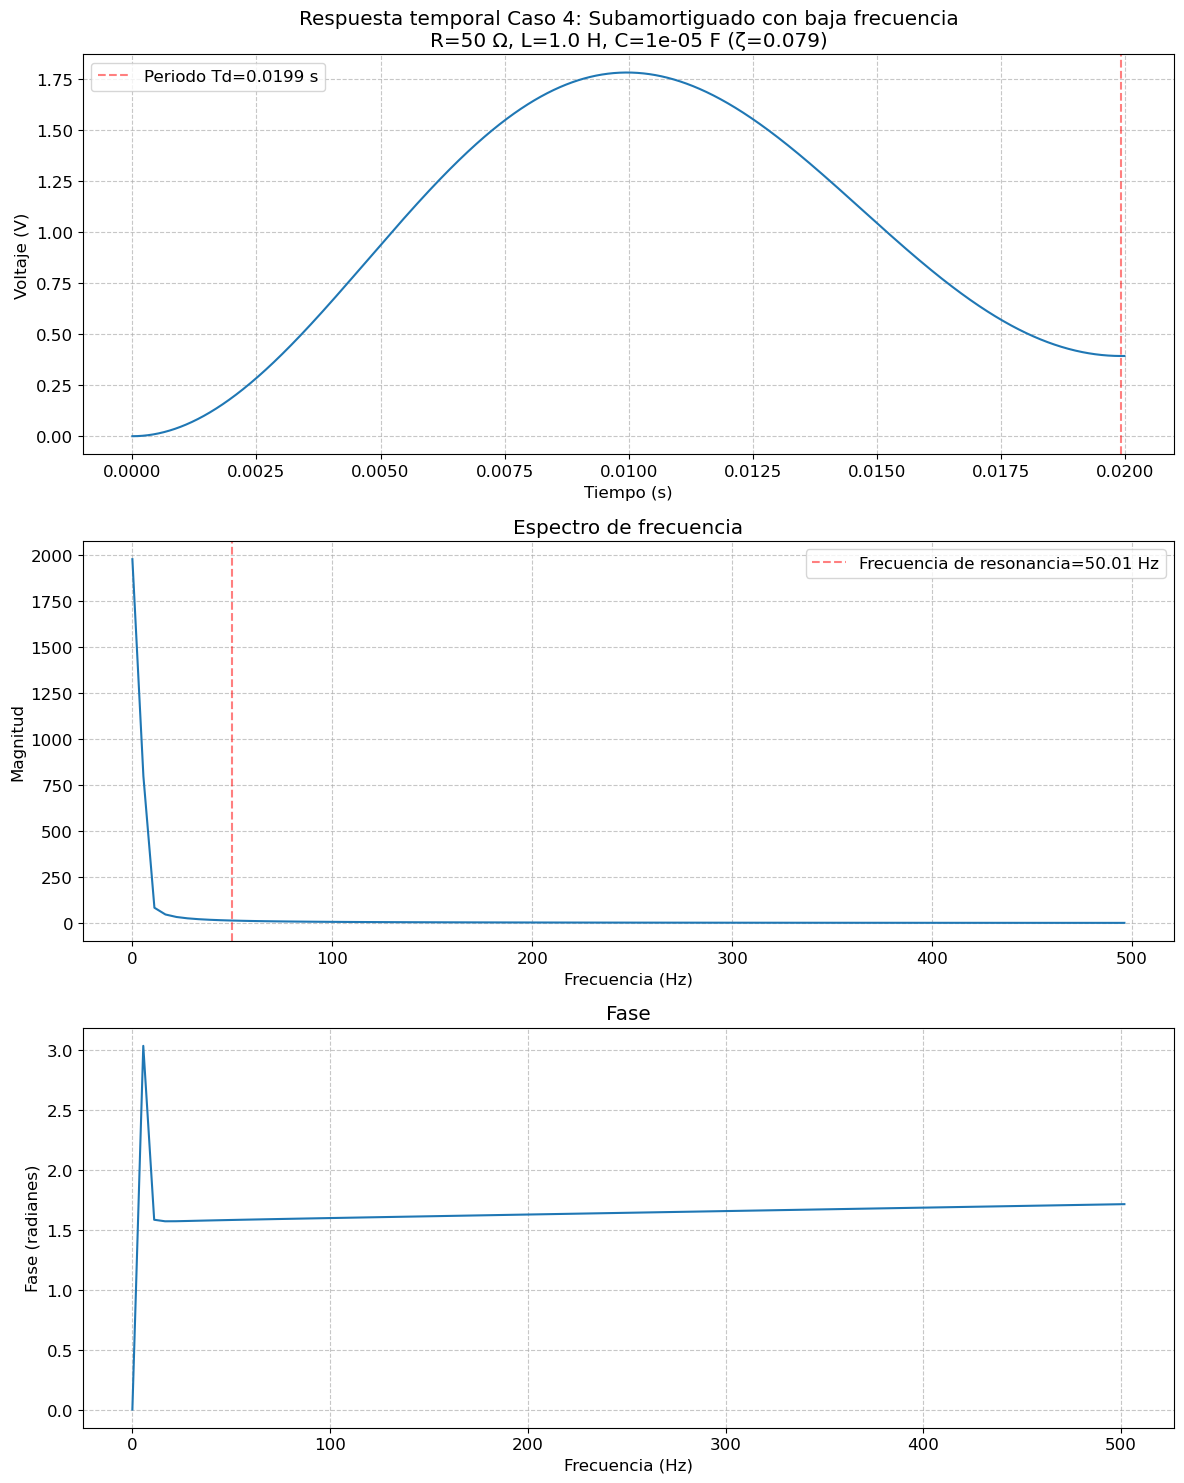

ANÁLISIS DEL CIRCUITO RLC: Caso 4: Subamortiguado con baja frecuencia
Resistencia (R): 50 Ω
Inductancia (L): 1.0 H
Capacitancia (C): 1e-05 F
Frecuencia natural (f0): 50.3292 Hz
Factor de amortiguamiento (ζ): 0.0791
El circuito está SUBAMORTIGUADO (0 < ζ < 1)
Frecuencia de oscilación amortiguada (fd): 50.1717 Hz
Periodo de oscilación (Td): 0.019932 s

ANÁLISIS DETALLADO:
Similar al Caso 1 pero con una frecuencia natural más baja debido a valores mayores de L y C. Las oscilaciones son más lentas pero aún claramente visibles.

Características adicionales:
- Frecuencia de oscilación: 50.17 Hz
- Sobrepico estimado: 77.95%

CASO 5: SOBREAMORTIGUADO EXTREMO


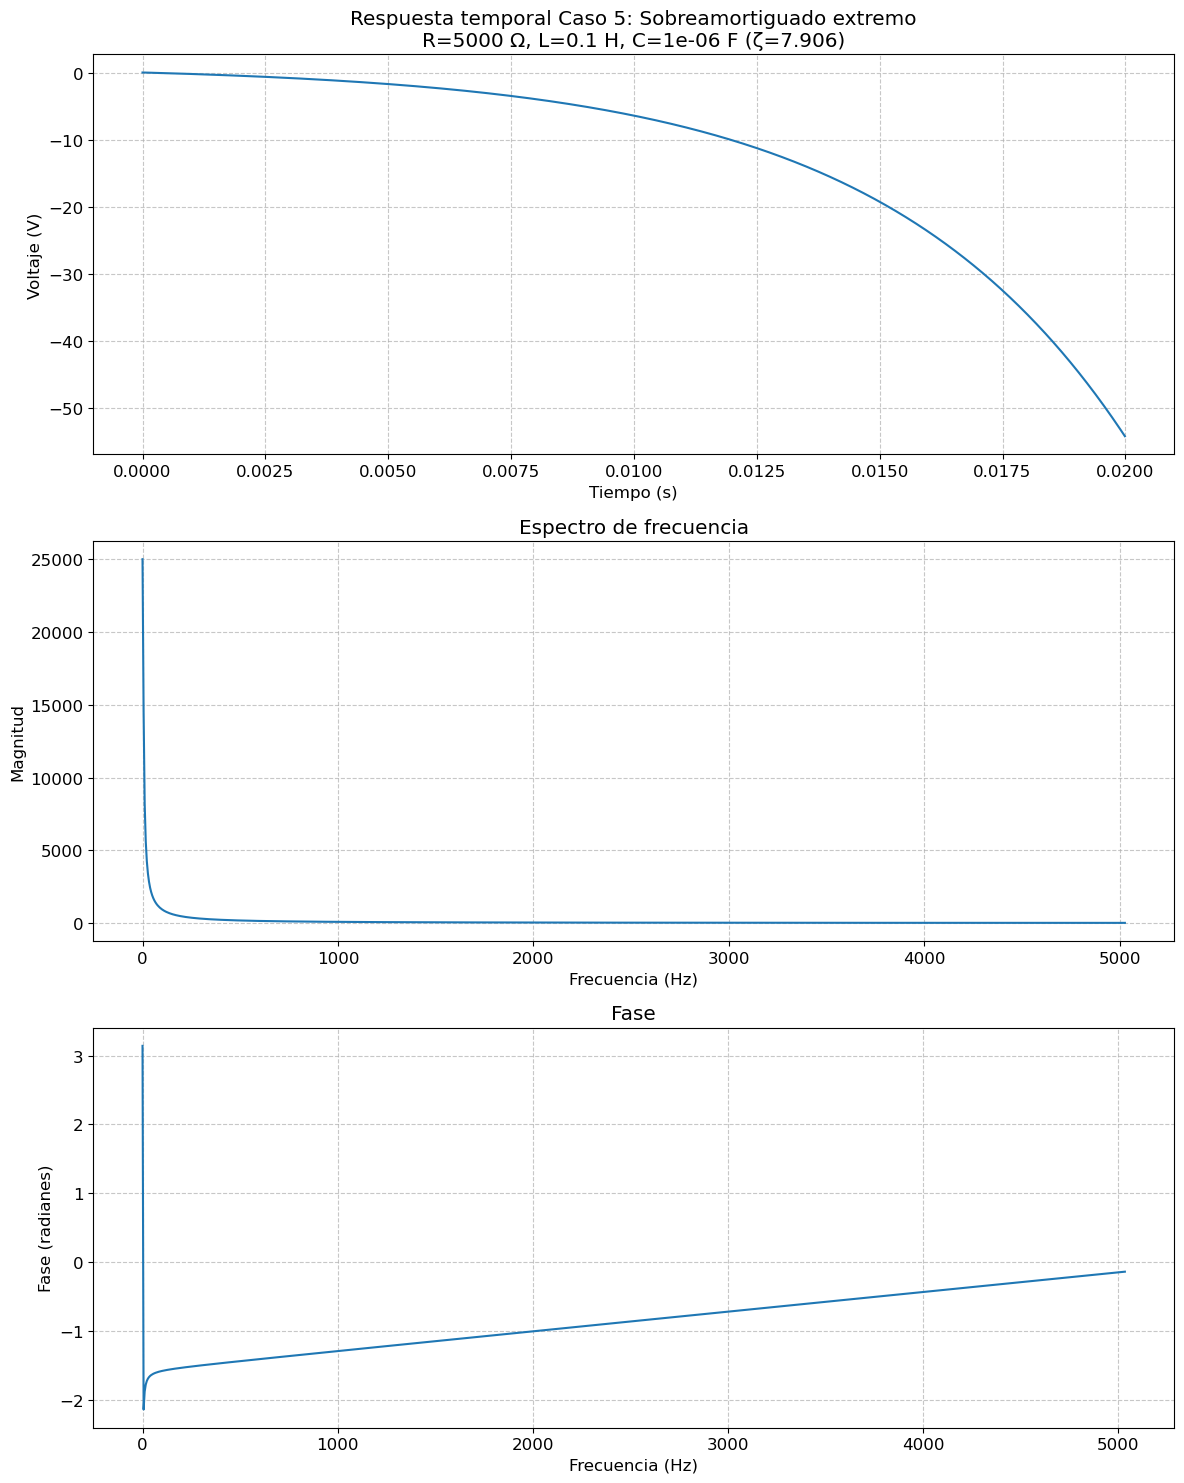

ANÁLISIS DEL CIRCUITO RLC: Caso 5: Sobreamortiguado extremo
Resistencia (R): 5000 Ω
Inductancia (L): 0.1 H
Capacitancia (C): 1e-06 F
Frecuencia natural (f0): 503.2921 Hz
Factor de amortiguamiento (ζ): 7.9057
El circuito está SOBREAMORTIGUADO (ζ > 1)
Constantes de tiempo: tau1 = 0.049799 s, tau2 = 0.000201 s

ANÁLISIS DETALLADO:
Con una resistencia muy alta, el circuito está fuertemente sobreamortiguado. La respuesta es muy lenta y no presenta oscilaciones. La constante de tiempo es dominada por la resistencia alta.


In [40]:
# Analizar y graficar cada caso
for i, caso in enumerate(casos, 1):
    print(f"\n{'='*70}")
    print(f"{caso['nombre'].upper()}")
    print(f"{'='*70}")
    
    # Calcular la respuesta del circuito
    wave = respuesta_rlc(caso["R"], caso["L"], caso["C"], t, caso["entrada"])
    
    # Crear figura con 3 subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))
    
    # 1. Gráfico de respuesta temporal
    plt.sca(ax1)  # Establecer los ejes actuales
    wave.plot()
    zeta = caso["R"] / (2 * np.sqrt(caso["L"] / caso["C"]))
    ax1.set_title(f'Respuesta temporal {caso["nombre"]}\nR={caso["R"]} Ω, L={caso["L"]} H, C={caso["C"]} F (ζ={zeta:.3f})')
    ax1.set_xlabel('Tiempo (s)')
    ax1.set_ylabel('Voltaje (V)')
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Añadir líneas verticales para tiempos característicos (solo para subamortiguado)
    if zeta < 1:
        w0 = 1 / np.sqrt(caso["L"] * caso["C"])
        Td = 2 * np.pi / (w0 * np.sqrt(1 - zeta**2))
        ax1.axvline(x=Td, color='r', linestyle='--', alpha=0.5, label=f'Periodo Td={Td:.4f} s')
        ax1.legend()
    
    # 2. Calcular y graficar espectro
    spectrum = wave.make_spectrum()
    f0 = 1 / (2 * np.pi * np.sqrt(caso["L"] * caso["C"]))
    high_freq = min(10 * f0, 1/(2*t[1]))
    
    plt.sca(ax2)  # Establecer los ejes actuales
    spectrum.plot(high=high_freq)
    ax2.set_title('Espectro de frecuencia')
    ax2.set_xlabel('Frecuencia (Hz)')
    ax2.set_ylabel('Magnitud')
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    # Resaltar la frecuencia de resonancia si es subamortiguado
    if zeta < 1:
        fres = f0 * np.sqrt(1 - 2*zeta**2)
        ax2.axvline(x=fres, color='r', linestyle='--', alpha=0.5, label=f'Frecuencia de resonancia={fres:.2f} Hz')
        ax2.legend()
    
    # 3. Graficar fase - MANUALMENTE (ya que thinkdsp no tiene plot_phase)
    plt.sca(ax3)  # Establecer los ejes actuales
    # Filtrar frecuencias hasta high_freq
    freqs = spectrum.fs[spectrum.fs <= high_freq]
    # Obtener las fases correspondientes
    # Necesitamos usar los índices para obtener las fases correctas
    indices = np.where(spectrum.fs <= high_freq)[0]
    phases = spectrum.angles[indices]
    
    ax3.plot(freqs, phases)
    ax3.set_title('Fase')
    ax3.set_xlabel('Frecuencia (Hz)')
    ax3.set_ylabel('Fase (radianes)')
    ax3.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    # Mostrar información detallada del circuito
    print(f"{'='*50}")
    print(f"ANÁLISIS DEL CIRCUITO RLC: {caso['nombre']}")
    print(f"{'='*50}")
    print(f"Resistencia (R): {caso['R']} Ω")
    print(f"Inductancia (L): {caso['L']} H")
    print(f"Capacitancia (C): {caso['C']} F")
    print(f"Frecuencia natural (f0): {f0:.4f} Hz")
    print(f"Factor de amortiguamiento (ζ): {zeta:.4f}")
    
    # Clasificar y describir el tipo de respuesta
    if zeta < 1:
        wd = w0 * np.sqrt(1 - zeta**2)
        fd = wd / (2 * np.pi)
        print(f"El circuito está SUBAMORTIGUADO (0 < ζ < 1)")
        print(f"Frecuencia de oscilación amortiguada (fd): {fd:.4f} Hz")
        print(f"Periodo de oscilación (Td): {1/fd:.6f} s")
    elif zeta == 1:
        print("El circuito está CRÍTICAMENTE AMORTIGUADO (ζ = 1)")
    else:
        print("El circuito está SOBREAMORTIGUADO (ζ > 1)")
        tau1 = 1 / (w0 * (zeta - np.sqrt(zeta**2 - 1)))
        tau2 = 1 / (w0 * (zeta + np.sqrt(zeta**2 - 1)))
        print(f"Constantes de tiempo: tau1 = {tau1:.6f} s, tau2 = {tau2:.6f} s")
    
    # Mostrar comentario específico para el caso
    print("\nANÁLISIS DETALLADO:")
    print(caso["comentario"])
    
    # Cálculos adicionales para subamortiguados
    if i in [1, 4]:  # Casos subamortiguados
        overshoot = np.exp(-np.pi * zeta / np.sqrt(1 - zeta**2)) * 100
        
        print(f"\nCaracterísticas adicionales:")
        print(f"- Frecuencia de oscilación: {fd:.2f} Hz")
        print(f"- Sobrepico estimado: {overshoot:.2f}%")

In [38]:
%%markdown
# COMPARACIÓN Y ANÁLISIS GENERAL DE LOS CASOS

## Resumen de comportamientos

| Caso | Tipo de amortiguamiento | ζ | Características principales |
|------|-------------------------|---|-----------------------------|
| 1 | Subamortiguado | < 1 | Oscilaciones claras, frecuencia de ~159 Hz |
| 2 | Críticamente amortiguado | = 1 | Respuesta rápida sin oscilaciones |
| 3 | Sobreamortiguado | > 1 | Respuesta lenta sin oscilaciones |
| 4 | Subamortiguado | < 1 | Oscilaciones más lentas (~50 Hz) |
| 5 | Sobreamortiguado extremo | >> 1 | Respuesta muy lenta |

## Observaciones clave

1. **Efecto del factor de amortiguamiento (ζ)**:
   - A medida que ζ aumenta, las oscilaciones desaparecen
   - El valor ζ = 1 representa el límite óptimo para una respuesta rápida sin oscilaciones
   - Para ζ > 1, la respuesta se vuelve cada vez más lenta a medida que aumenta R

2. **Frecuencia natural vs. frecuencia de operación**:
   - La frecuencia natural $f_0 = \\frac{1}{2\\pi\\sqrt{LC}}$ determina la escala de frecuencia del sistema
   - En sistemas subamortiguados, la frecuencia de oscilación real es $f_d = f_0\\sqrt{1-\\zeta^2}$

3. **Aplicaciones prácticas**:
   - **Circuitos subamortiguados** (ζ < 1): Usados en osciladores, filtros selectivos, circuitos de sintonía
   - **Circuitos críticamente amortiguados** (ζ = 1): Ideales para sistemas que requieren respuesta rápida sin sobrepico (ej. sistemas de control)
   - **Circuitos sobreamortiguados** (ζ > 1): Útiles cuando se busca estabilidad a costa de velocidad (ej. en algunos filtros pasivos)

## Conclusión

El análisis del circuito RLC serie demuestra cómo los parámetros R, L y C determinan fundamentalmente el comportamiento del sistema. La elección de estos componentes debe basarse en los requisitos específicos de la aplicación, equilibrando factores como velocidad de respuesta, presencia de oscilaciones y estabilidad.

En diseño práctico, los valores comerciales de componentes limitan las combinaciones exactas posibles, por lo que a menudo se requiere seleccionar valores estándar que se acerquen al comportamiento deseado.

# COMPARACIÓN Y ANÁLISIS GENERAL DE LOS CASOS

## Resumen de comportamientos

| Caso | Tipo de amortiguamiento | ζ | Características principales |
|------|-------------------------|---|-----------------------------|
| 1 | Subamortiguado | < 1 | Oscilaciones claras, frecuencia de ~159 Hz |
| 2 | Críticamente amortiguado | = 1 | Respuesta rápida sin oscilaciones |
| 3 | Sobreamortiguado | > 1 | Respuesta lenta sin oscilaciones |
| 4 | Subamortiguado | < 1 | Oscilaciones más lentas (~50 Hz) |
| 5 | Sobreamortiguado extremo | >> 1 | Respuesta muy lenta |

## Observaciones clave

1. **Efecto del factor de amortiguamiento (ζ)**:
   - A medida que ζ aumenta, las oscilaciones desaparecen
   - El valor ζ = 1 representa el límite óptimo para una respuesta rápida sin oscilaciones
   - Para ζ > 1, la respuesta se vuelve cada vez más lenta a medida que aumenta R

2. **Frecuencia natural vs. frecuencia de operación**:
   - La frecuencia natural $f_0 = \\frac{1}{2\\pi\\sqrt{LC}}$ determina la escala de frecuencia del sistema
   - En sistemas subamortiguados, la frecuencia de oscilación real es $f_d = f_0\\sqrt{1-\\zeta^2}$

3. **Aplicaciones prácticas**:
   - **Circuitos subamortiguados** (ζ < 1): Usados en osciladores, filtros selectivos, circuitos de sintonía
   - **Circuitos críticamente amortiguados** (ζ = 1): Ideales para sistemas que requieren respuesta rápida sin sobrepico (ej. sistemas de control)
   - **Circuitos sobreamortiguados** (ζ > 1): Útiles cuando se busca estabilidad a costa de velocidad (ej. en algunos filtros pasivos)

## Conclusión

El análisis del circuito RLC serie demuestra cómo los parámetros R, L y C determinan fundamentalmente el comportamiento del sistema. La elección de estos componentes debe basarse en los requisitos específicos de la aplicación, equilibrando factores como velocidad de respuesta, presencia de oscilaciones y estabilidad.

En diseño práctico, los valores comerciales de componentes limitan las combinaciones exactas posibles, por lo que a menudo se requiere seleccionar valores estándar que se acerquen al comportamiento deseado.
